In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M = 7e6
M_0 = 0
M_H = -1


Prandtl = 1.0
stop_sim_time = 2000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['snapshots/snapshots_s1.h5', 'snapshots/snapshots_s2.h5', 'snapshots/snapshots_s3.h5', 'snapshots/snapshots_s4.h5', 'snapshots/snapshots_s5.h5', 'snapshots/snapshots_s6.h5', 'snapshots/snapshots_s7.h5', 'snapshots/snapshots_s8.h5', 'snapshots/snapshots_s9.h5', 'snapshots/snapshots_s10.h5', 'snapshots/snapshots_s11.h5', 'snapshots/snapshots_s12.h5', 'snapshots/snapshots_s13.h5', 'snapshots/snapshots_s14.h5', 'snapshots/snapshots_s15.h5', 'snapshots/snapshots_s16.h5', 'snapshots/snapshots_s17.h5', 'snapshots/snapshots_s18.h5', 'snapshots/snapshots_s19.h5', 'snapshots/snapshots_s20.h5', 'snapshots/snapshots_s21.h5', 'snapshots/snapshots_s22.h5', 'snapshots/snapshots_s23.h5', 'snapshots/snapshots_s24.h5', 'snapshots/snapshots_s25.h5', 'snapshots/snapshots_s26.h5', 'snapshots/snapshots_s27.h5', 'snapshots/snapshots_s28.h5', 'snapshots/snapshots_s29.h5', 'snapshots/snapshots_s30.h5', 'snapshots/snapshots_s31.h5', 'snapshots/snapshots_s32.h5', 'snapshots/snapshots_s33.h5', 'snapshots/snapsho

In [ ]:
"""
TOTAL KE
"""
n = 0
if not os.path.exists('TOT_KEs'):
    os.mkdir('TOT_KEs')

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            n = n + 1
        print(len(all_tot_ke))
print(all_tot_ke[100])

50
100
150
200


In [ ]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x*nu/(Nz**2)/4) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()

In [4]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            all_tot_uy.append(np.sum(uuuyyy))
        print(len(all_tot_uy))
print(all_tot_uy[100])

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
-13.279149942070653


8000
8000


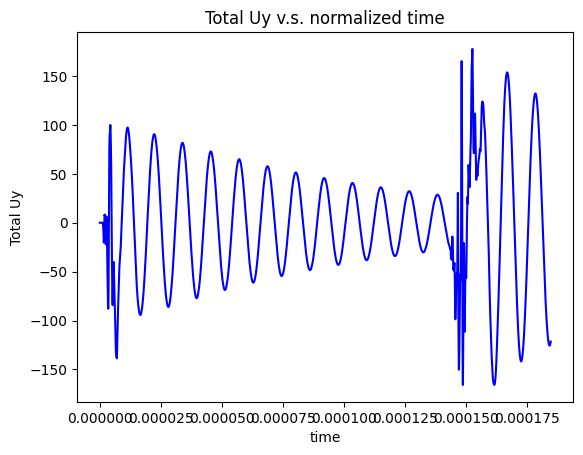

In [5]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x*nu/(Nz**2)/4) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Uy')
plt.title('Total Uy v.s. normalized time')
plt.show()